SEEDS PROJECT

In [182]:
%pwd

'/home/bensweeney/uclax-data-science/Projects'

In [183]:
!pip install tqdm

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [213]:
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from time import time
from bic import BIC
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
from patsy import dmatrices
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.dummy import DummyClassifier
import scipy.stats as ss
from sklearn.metrics import recall_score  
from patsy import dmatrices
from sklearn.linear_model import LinearRegression


%matplotlib inline


features = ['Area','Perimeter','Compactness','Length_of_Kernel','Width_of_Kernel','Asymmetry_Coefficient','Length_of_Kernel_Groove','Target']
SEEDS_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'
seeds_df = pd.read_csv(SEEDS_DATA_URL, sep="\s+", header= None)
seeds_df.columns = features


wheat_seeds = np.array(['Kama','Rosa','Canadian'])

seeds_df["Target"]= seeds_df["Target"]-1

seeds_df["Names"] = [wheat_seeds[i] for i in seeds_df["Target"]]

seeds_df

,Area,Perimeter,Compactness,Length_of_Kernel,Width_of_Kernel,Asymmetry_Coefficient,Length_of_Kernel_Groove,Target,Names
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220,0,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956,0,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825,0,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805,0,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175,0,Kama
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956,0,Kama
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219,0,Kama
7,14.11,14.10,0.8911,5.420,3.302,2.7000,5.000,0,Kama
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877,0,Kama
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533,0,Kama


In [214]:
# seeds_df.describe()

In [215]:
# Visualize the data (pairplots)

# plt.figure(1, (10,10))
# sns.pairplot(seeds_df, size=2, aspect=1)

In [216]:
# Visulize the data (bar graphs)

# _, ax = plt.subplots(1,4, figsize=(20,6))

# for i in range(4):
#     for seeds_class in seeds_df.target.unique():
#         plotting_df = seeds_df[seeds_df.target == iris_class ]
#         sns.distplot(plotting_df[features[i]], ax=ax[i], label=seeds_class)
#         ax[i].legend()

# sns.countplot(y="seeds_df", data=seeds_df)
# plt.show()

In [217]:
# Train Test Split

targetTTS, featuresTTS = dmatrices("Target ~ Area", seeds_df)

(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(featuresTTS, targetTTS, random_state=42) 

linear_regression_model = LinearRegression(fit_intercept=False)

linear_regression_model.fit(features_train, target_train)

petal_width_prediction_1_var = (linear_regression_model
                                .predict(features_test))

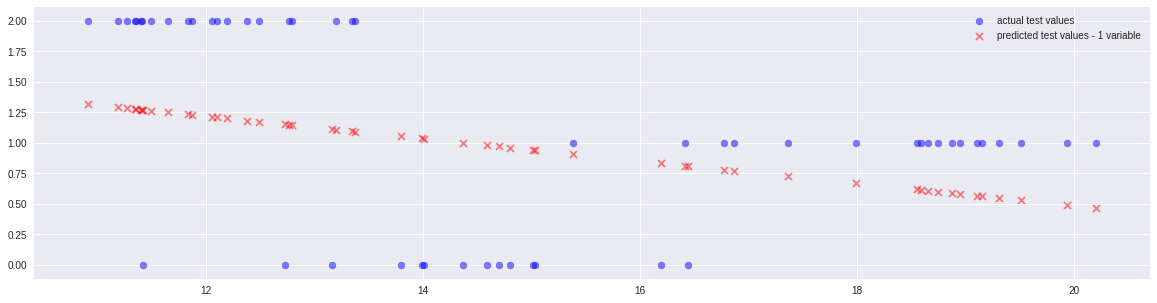

In [218]:
plt.figure(1, (20,5))

plt.scatter(features_test[:, 1], target_test, 
            marker='o', color='blue', alpha=0.5, 
            label='actual test values')
plt.scatter(features_test[:, 1], petal_width_prediction_1_var,
            marker='x', color='red', alpha=0.5, 
            label='predicted test values - 1 variable')
plt.legend()

In [219]:
# Classification (BIC)

In [220]:
def BIC(features, target, model):
    model.fit(features, target)
    prediction = model.predict_proba(features)
    n = len(target)
    p = features.shape[1] #len(target.keys()) #
    complexity = math.log(n)*(p+1)
    likelyhood = -2*log_loss(target, prediction)
    return complexity - likelyhood

In [221]:
#BIC Round 1

target1_1, features1_1 = dmatrices("Target ~ 1 + Perimeter + Compactness + Length_of_Kernel + Width_of_Kernel \
                                        + Asymmetry_Coefficient + Length_of_Kernel_Groove", seeds_df)
target1_2, features1_2 = dmatrices("Target ~ 1 + Area + Compactness + Length_of_Kernel + Width_of_Kernel \
                                        + Asymmetry_Coefficient + Length_of_Kernel_Groove", seeds_df)
target1_3, features1_3 = dmatrices("Target ~ 1 + Area + Perimeter + Length_of_Kernel + Width_of_Kernel \
                                        + Asymmetry_Coefficient + Length_of_Kernel_Groove", seeds_df)
target1_4, features1_4 = dmatrices("Target ~ 1 + Area + Perimeter + Compactness + Width_of_Kernel \
                                        + Asymmetry_Coefficient + Length_of_Kernel_Groove", seeds_df)
target1_5, features1_5 = dmatrices("Target ~ 1 + Area + Perimeter + Compactness + Length_of_Kernel \
                                        + Asymmetry_Coefficient + Length_of_Kernel_Groove", seeds_df)
target1_6, features1_6 = dmatrices("Target ~ 1 + Area + Perimeter + Compactness + Length_of_Kernel + Width_of_Kernel \
                                        + Length_of_Kernel_Groove", seeds_df)
target1_7, features1_7 = dmatrices("Target ~ 1 + Area + Perimeter + Compactness + Length_of_Kernel + Width_of_Kernel \
                                        + Asymmetry_Coefficient", seeds_df)

lr_seeds1_1 = LogisticRegression()
lr_seeds1_2 = LogisticRegression()
lr_seeds1_3 = LogisticRegression()
lr_seeds1_4 = LogisticRegression()
lr_seeds1_5 = LogisticRegression()
lr_seeds1_6 = LogisticRegression()
lr_seeds1_7 = LogisticRegression()

BIC1_1 = BIC(features1_1, target1_1, lr_seeds1_1)
print(BIC1_1)
BIC1_2 = BIC(features1_2, target1_2, lr_seeds1_2)
print(BIC1_2)
BIC1_3 = BIC(features1_3, target1_3, lr_seeds1_3)
print(BIC1_3)
BIC1_4 = BIC(features1_4, target1_4, lr_seeds1_4)
print(BIC1_4)
BIC1_5 = BIC(features1_5, target1_5, lr_seeds1_5)
print(BIC1_5)
BIC1_6 = BIC(features1_6, target1_6, lr_seeds1_6)
print(BIC1_6)
BIC1_7 = BIC(features1_7, target1_7, lr_seeds1_7)
print(BIC1_7)


43.6729747225
43.3371999919
43.2717473211
43.2791965365
43.2785888047
43.3804378115
43.445939933


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [222]:
# BIC Round 2 (Remove Compactness)

target2_1, features2_1 = dmatrices("Target ~ 1 + Perimeter + Length_of_Kernel + Width_of_Kernel \
                                        + Asymmetry_Coefficient + Length_of_Kernel_Groove", seeds_df)
target2_2, features2_2 = dmatrices("Target ~ 1 + Area + Length_of_Kernel + Width_of_Kernel \
                                        + Asymmetry_Coefficient + Length_of_Kernel_Groove", seeds_df)
target2_3, features2_3 = dmatrices("Target ~ 1 + Area + Perimeter + Width_of_Kernel \
                                        + Asymmetry_Coefficient + Length_of_Kernel_Groove", seeds_df)
target2_4, features2_4 = dmatrices("Target ~ 1 + Area + Perimeter + Length_of_Kernel \
                                        + Asymmetry_Coefficient + Length_of_Kernel_Groove", seeds_df)
target2_5, features2_5 = dmatrices("Target ~ 1 + Area + Perimeter + Length_of_Kernel + Width_of_Kernel \
                                        + Length_of_Kernel_Groove", seeds_df)
target2_6, features2_6 = dmatrices("Target ~ 1 + Area + Perimeter + Length_of_Kernel + Width_of_Kernel \
                                        + Asymmetry_Coefficient", seeds_df)

lr_seeds2_1 = LogisticRegression()
lr_seeds2_2 = LogisticRegression()
lr_seeds2_3 = LogisticRegression()
lr_seeds2_4 = LogisticRegression()
lr_seeds2_5 = LogisticRegression()
lr_seeds2_6 = LogisticRegression()


BIC2_1 = BIC(features2_1, target2_1, lr_seeds2_1)
print(BIC2_1)
BIC2_2 = BIC(features2_2, target2_2, lr_seeds2_2)
print(BIC2_2)
BIC2_3 = BIC(features2_3, target2_3, lr_seeds2_3)
print(BIC2_3)
BIC2_4 = BIC(features2_4, target2_4, lr_seeds2_4)
print(BIC2_4)
BIC2_5 = BIC(features2_5, target2_5, lr_seeds2_5)
print(BIC2_5)
BIC2_6 = BIC(features2_6, target2_6, lr_seeds2_6)
print(BIC2_6)


38.366049682
37.9966204582
37.9334839964
37.9334450434
38.0346356199
38.101351212


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [223]:
# BIC Round 3 (Remove Compactness & Width of Kernel)

target3_1, features3_1 = dmatrices("Target ~ 1 + Perimeter + Length_of_Kernel \
                                        + Asymmetry_Coefficient + Length_of_Kernel_Groove", seeds_df)
target3_2, features3_2 = dmatrices("Target ~ 1 + Area + Length_of_Kernel  \
                                        + Asymmetry_Coefficient + Length_of_Kernel_Groove", seeds_df)
target3_3, features3_3 = dmatrices("Target ~ 1 + Area + Perimeter \
                                        + Asymmetry_Coefficient + Length_of_Kernel_Groove", seeds_df)
target3_4, features3_4 = dmatrices("Target ~ 1 + Area + Perimeter + Length_of_Kernel \
                                        + Asymmetry_Coefficient + Length_of_Kernel_Groove", seeds_df)
target3_5, features3_5 = dmatrices("Target ~ 1 + Area + Perimeter + Length_of_Kernel \
                                        + Length_of_Kernel_Groove", seeds_df)

lr_seeds3_1 = LogisticRegression()
lr_seeds3_2 = LogisticRegression()
lr_seeds3_3 = LogisticRegression()
lr_seeds3_4 = LogisticRegression()
lr_seeds3_5 = LogisticRegression()


BIC3_1 = BIC(features3_1, target3_1, lr_seeds3_1)
print(BIC3_1)
BIC3_2 = BIC(features3_2, target3_2, lr_seeds3_2)
print(BIC3_2)
BIC3_3 = BIC(features3_3, target3_3, lr_seeds3_3)
print(BIC3_3)
BIC3_4 = BIC(features3_4, target3_4, lr_seeds3_4)
print(BIC3_4)
BIC3_5 = BIC(features3_5, target3_5, lr_seeds3_5)
print(BIC3_5)

33.0406109322
32.7007824596
32.594302053
37.9334450434
32.6939102493


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [224]:
# BIC Round 4 (Remove Compactness & Width of Kernel & Length of Kernel)

target4_1, features4_1 = dmatrices("Target ~ 1 + Perimeter \
                                        + Asymmetry_Coefficient + Length_of_Kernel_Groove", seeds_df)
target4_2, features4_2 = dmatrices("Target ~ 1 + Area  \
                                        + Asymmetry_Coefficient + Length_of_Kernel_Groove", seeds_df)
target4_3, features4_3 = dmatrices("Target ~ 1 + Area + Perimeter \
                                        + Length_of_Kernel_Groove", seeds_df)
target4_4, features4_4 = dmatrices("Target ~ 1 + Area + Perimeter + Length_of_Kernel \
                                        + Asymmetry_Coefficient", seeds_df)

lr_seeds4_1 = LogisticRegression()
lr_seeds4_2 = LogisticRegression()
lr_seeds4_3 = LogisticRegression()
lr_seeds4_4 = LogisticRegression()

BIC4_1 = BIC(features4_1, target4_1, lr_seeds4_1)
print(BIC4_1)
BIC4_2 = BIC(features4_2, target4_2, lr_seeds4_2)
print(BIC4_2)
BIC4_3 = BIC(features4_3, target4_3, lr_seeds4_3)
print(BIC4_3)
BIC4_4 = BIC(features4_4, target4_4, lr_seeds4_4)
print(BIC4_4)


27.759776583
27.5509238393
27.3570534074
32.7868913354


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [225]:
# BIC Round 5 (Remove Compactness & Width of Kernel & Length of Kernel & Assymmetry Coefficient)

target5_1, features5_1 = dmatrices("Target ~ 1 + Perimeter \
                                        + Length_of_Kernel_Groove", seeds_df)
target5_2, features5_2 = dmatrices("Target ~ 1 + Area  \
                                        + Length_of_Kernel_Groove", seeds_df)
target5_3, features5_3 = dmatrices("Target ~ 1 + Area + Perimeter", seeds_df)

lr_seeds5_1 = LogisticRegression()
lr_seeds5_2 = LogisticRegression()
lr_seeds5_3 = LogisticRegression()


BIC5_1 = BIC(features5_1, target5_1, lr_seeds5_1)
print(BIC5_1)
BIC5_2 = BIC(features5_2, target5_2, lr_seeds5_2)
print(BIC5_2)
BIC5_3 = BIC(features5_3, target5_3, lr_seeds5_3)
print(BIC5_3)


22.5536734039
22.3225079558
22.3321458648


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [226]:
# BIC Round 6 (Remove Compactness & Width of Kernel & Length of Kernel & Assymmetry Coefficient & Length of Kernel Groove)

target6_1, features6_1 = dmatrices("Target ~ 1 + Perimeter", seeds_df)
target6_2, features6_2 = dmatrices("Target ~ 1 + Area ", seeds_df)

lr_seeds6_1 = LogisticRegression()
lr_seeds6_2 = LogisticRegression()

BIC6_1 = BIC(features6_1, target6_1, lr_seeds6_1)
print(BIC6_1)
BIC6_2 = BIC(features6_2, target6_2, lr_seeds6_2)
print(BIC6_2)


17.6799306502
17.319382043


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [197]:
print(FROM BIC WE SEE THAT THE CLASSIFICATION SHOULD BE DEFINED USING AREA)

In [23]:
# Clustering

In [25]:
def fit_and_time(model, data):
    start = time()
    model = model.fit(data)
    end = time() - start
    return {'fit_time' : end, 'model' : model}

def process_results(results_list, data):
    df = pd.DataFrame(results_list)
    df['k'] = df.model.apply(lambda x: x.n_clusters)
    df['bic'] = df.model.apply(lambda x: BIC(x, data))
    df['sil_sc'] = df.model.apply(lambda x: silhouette_score(data, x.labels_))
    df.set_index('k', inplace=True)
    return df 